In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prostate-cancer/Prostate_Cancer.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/prostate-cancer/Prostate_Cancer.csv')
dataset.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [3]:
import pandas as pd
import numpy as np
import math
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#mengubah data categoric
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from numpy import inf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
dataset = pd.read_csv('/kaggle/input/prostate-cancer/Prostate_Cancer.csv')
dataset.head() 

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [5]:
dataset.shape

(100, 10)

In [6]:
col_names = dataset.columns

col_names

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [7]:
dataset.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [8]:
dataset.columns = dataset.columns.str.strip()
dataset.columns
dataset['diagnosis_result'].value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

In [9]:
dataset['diagnosis_result'].value_counts()/float(len(dataset))

M    0.62
B    0.38
Name: diagnosis_result, dtype: float64

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [11]:
dataset.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [12]:
round(dataset.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
id,100.0,50.50,29.01,1.00,25.75,50.50,75.25,100.00
radius,100.0,16.85,4.88,9.00,12.00,17.00,21.00,25.00
texture,100.0,18.23,5.19,11.00,14.00,17.50,22.25,27.00
perimeter,100.0,96.78,23.68,52.00,82.50,94.00,114.25,172.00
area,100.0,702.88,319.71,202.00,476.75,644.00,917.00,1878.00
smoothness,100.0,0.10,0.01,0.07,0.09,0.10,0.11,0.14
compactness,100.0,0.13,0.06,0.04,0.08,0.12,0.16,0.34
symmetry,100.0,0.19,0.03,0.14,0.17,0.19,0.21,0.30
fractal_dimension,100.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [13]:
d = []
u = []
t = []
for col in dataset:
    d.append(col)
    u.append(dataset[col].nunique())
    t.append(dataset[col].dtype)
pd.DataFrame({'column':d,'type': t ,'unique value' : u})

,column,type,unique value
0,id,int64,100
1,diagnosis_result,object,2
2,radius,int64,16
3,texture,int64,17
4,perimeter,int64,55
5,area,int64,95
6,smoothness,float64,45
7,compactness,float64,85
8,symmetry,float64,64
9,fractal_dimension,float64,32


In [14]:
dataset = dataset.drop_duplicates()

In [15]:
dataset.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [16]:
#B =awal = 0 dan M = ganas 
labelencoder = LabelEncoder()
dataset['diagnosis_result'] = labelencoder.fit_transform(dataset['diagnosis_result'])

In [17]:
dataset.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [18]:
dataset.drop(['id'], axis = 1, inplace=True)

In [19]:
dataset.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


Text(0, 0.5, 'fractal_dimension')

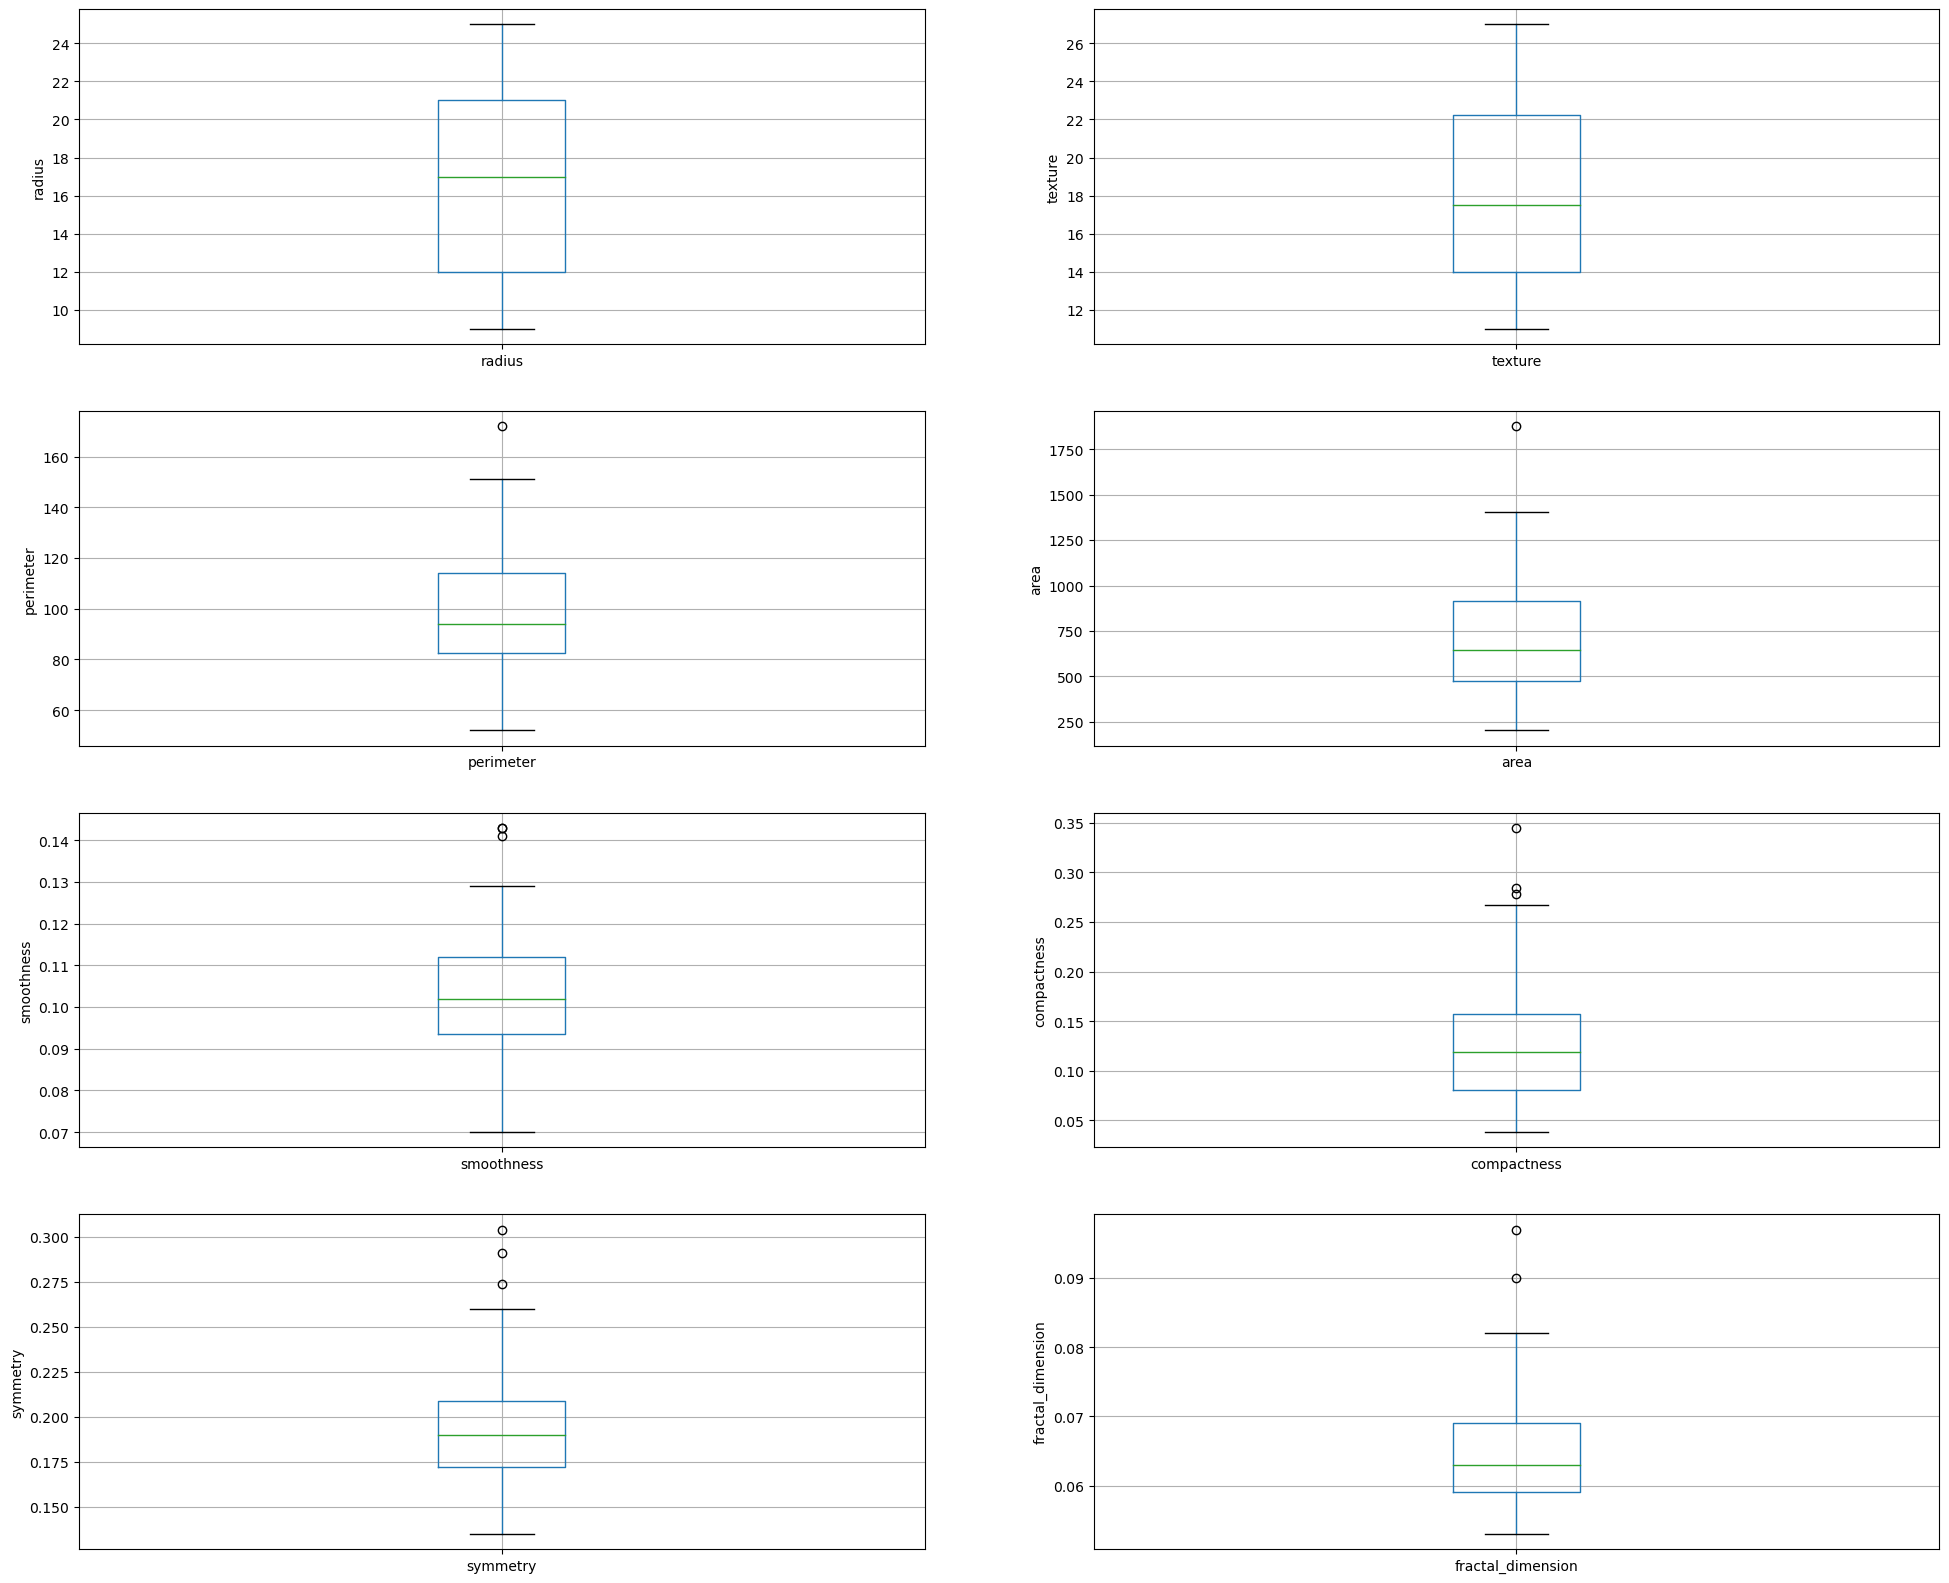

In [20]:
# draw boxplots to visualize outliers


plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = dataset.boxplot(column='radius')
fig.set_title('')
fig.set_ylabel('radius')


plt.subplot(4, 2, 2)
fig = dataset.boxplot(column='texture')
fig.set_title('')
fig.set_ylabel('texture')


plt.subplot(4, 2, 3)
fig = dataset.boxplot(column='perimeter')
fig.set_title('')
fig.set_ylabel('perimeter')

plt.subplot(4, 2, 4)
fig = dataset.boxplot(column='area')
fig.set_title('')
fig.set_ylabel('area')


plt.subplot(4, 2, 5)
fig = dataset.boxplot(column='smoothness')
fig.set_title('')
fig.set_ylabel('smoothness')

plt.subplot(4, 2, 6)
fig = dataset.boxplot(column='compactness')
fig.set_title('')
fig.set_ylabel('compactness')

plt.subplot(4, 2, 7)
fig = dataset.boxplot(column='symmetry')
fig.set_title('')
fig.set_ylabel('symmetry')


plt.subplot(4, 2, 8)
fig = dataset.boxplot(column='fractal_dimension')
fig.set_title('')
fig.set_ylabel('fractal_dimension')


In [21]:
for col in dataset.loc[:, dataset.columns != 'diagnosis_result']:
  q1 = dataset[col].quantile(0.25)
  q3 = dataset[col].quantile(0.75)
  iqr = q3 - q1
  whisker_width = 1.5
  lower_whisker = q1 - (whisker_width * iqr)
  upper_whisker = q3 + whisker_width * iqr
  dataset[col] = np.where(dataset[col] > upper_whisker, upper_whisker, np.where(dataset[col] < lower_whisker, lower_whisker, dataset[col]))

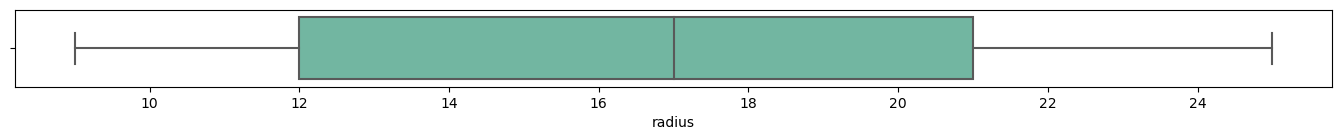

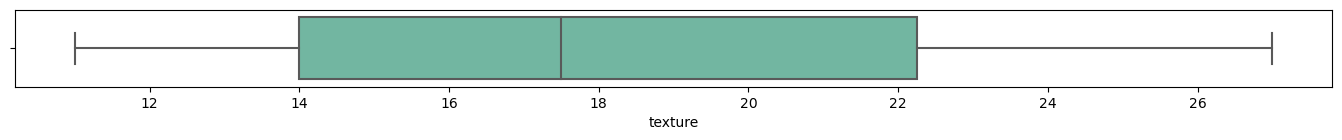

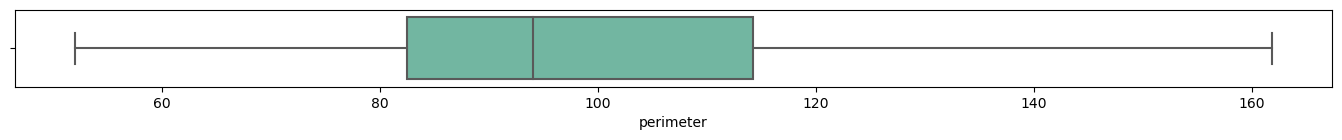

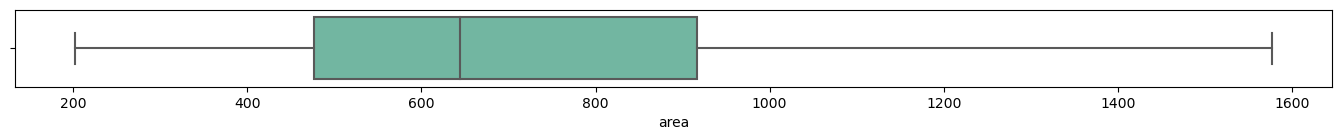

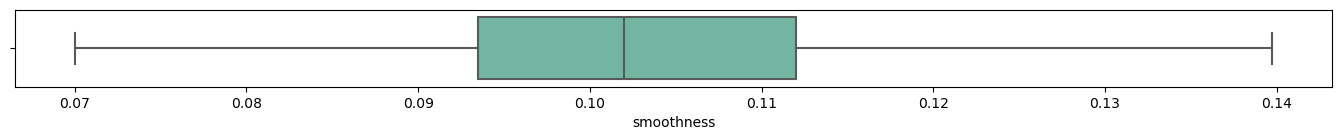

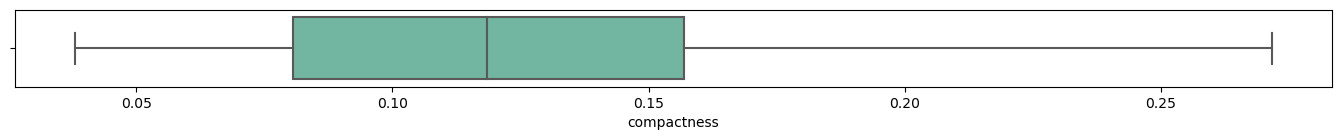

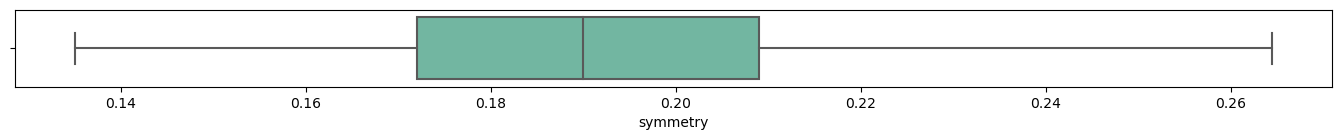

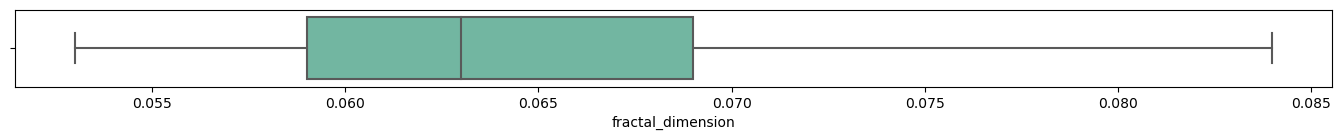

In [22]:
for column in dataset.loc[:, dataset.columns != 'diagnosis_result']:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=dataset, orient="h", palette="Set2", x=column)

Text(0, 0.5, 'fractal_dimension')

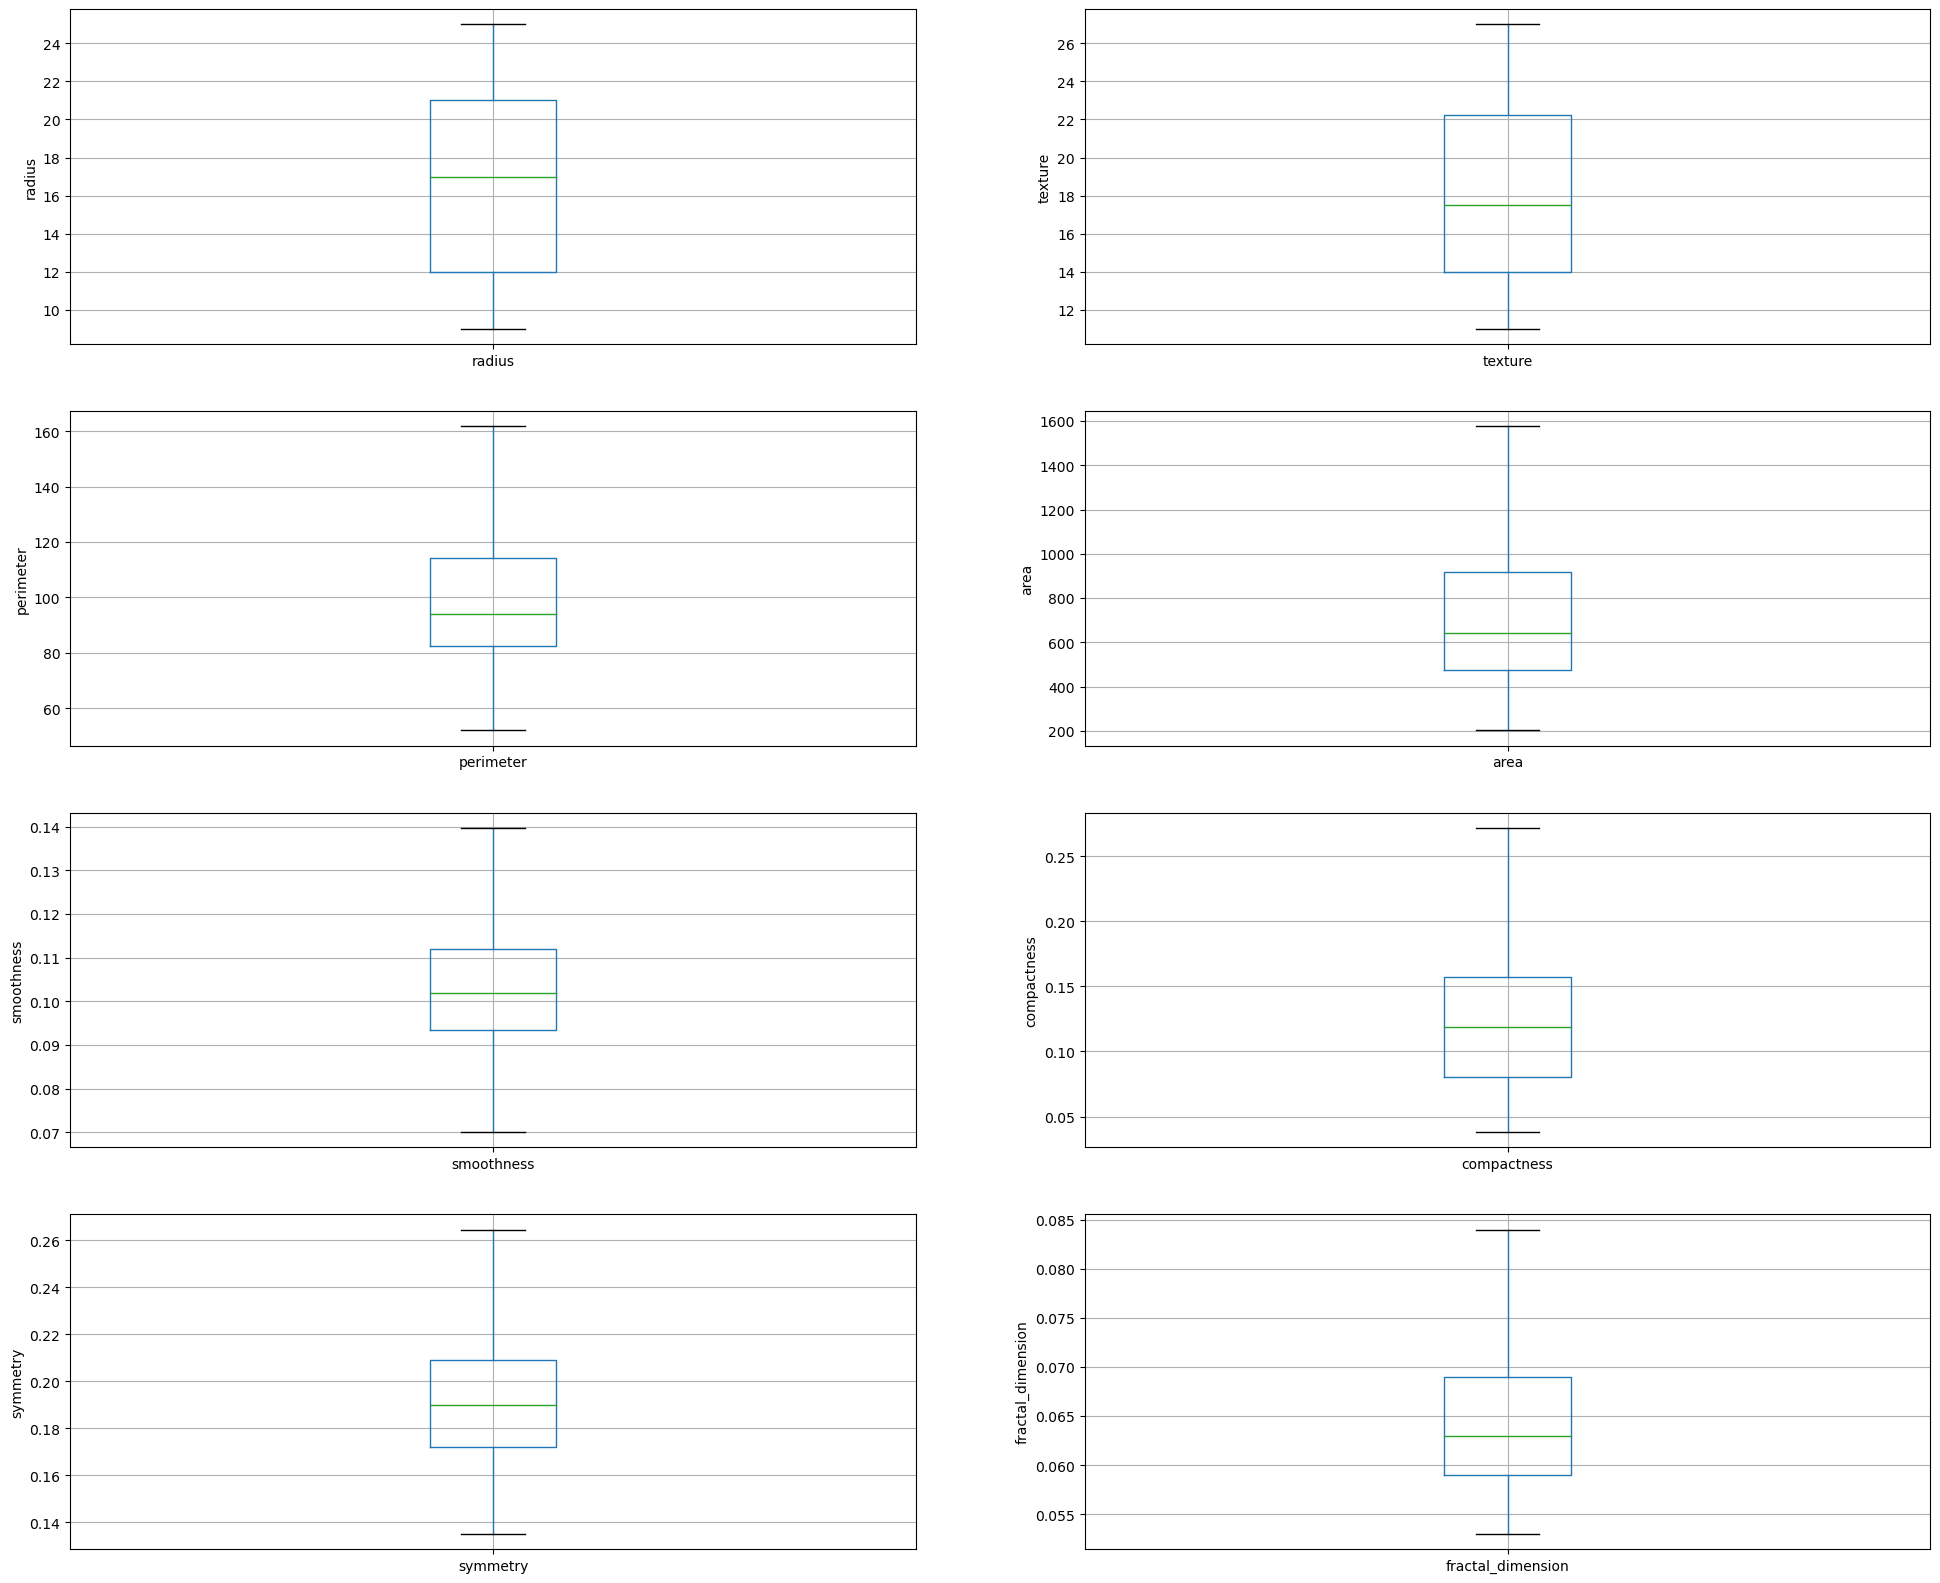

In [23]:
# draw boxplots to visualize outliers


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dataset.boxplot(column='radius')
fig.set_title('')
fig.set_ylabel('radius')


plt.subplot(4, 2, 2)
fig = dataset.boxplot(column='texture')
fig.set_title('')
fig.set_ylabel('texture')


plt.subplot(4, 2, 3)
fig = dataset.boxplot(column='perimeter')
fig.set_title('')
fig.set_ylabel('perimeter')

plt.subplot(4, 2, 4)
fig = dataset.boxplot(column='area')
fig.set_title('')
fig.set_ylabel('area')


plt.subplot(4, 2, 5)
fig = dataset.boxplot(column='smoothness')
fig.set_title('')
fig.set_ylabel('smoothness')

plt.subplot(4, 2, 6)
fig = dataset.boxplot(column='compactness')
fig.set_title('')
fig.set_ylabel('compactness')

plt.subplot(4, 2, 7)
fig = dataset.boxplot(column='symmetry')
fig.set_title('')
fig.set_ylabel('symmetry')


plt.subplot(4, 2, 8)
fig = dataset.boxplot(column='fractal_dimension')
fig.set_title('')
fig.set_ylabel('fractal_dimension')


In [24]:
round(dataset.describe(),2)

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,0.62,16.85,18.23,96.68,699.87,0.10,0.13,0.19,0.06
std,0.49,4.88,5.19,23.37,309.81,0.01,0.06,0.03,0.01
min,0.00,9.00,11.00,52.00,202.00,0.07,0.04,0.14,0.05
25%,0.00,12.00,14.00,82.50,476.75,0.09,0.08,0.17,0.06
50%,1.00,17.00,17.50,94.00,644.00,0.10,0.12,0.19,0.06
75%,1.00,21.00,22.25,114.25,917.00,0.11,0.16,0.21,0.07
max,1.00,25.00,27.00,161.88,1577.38,0.14,0.27,0.26,0.08


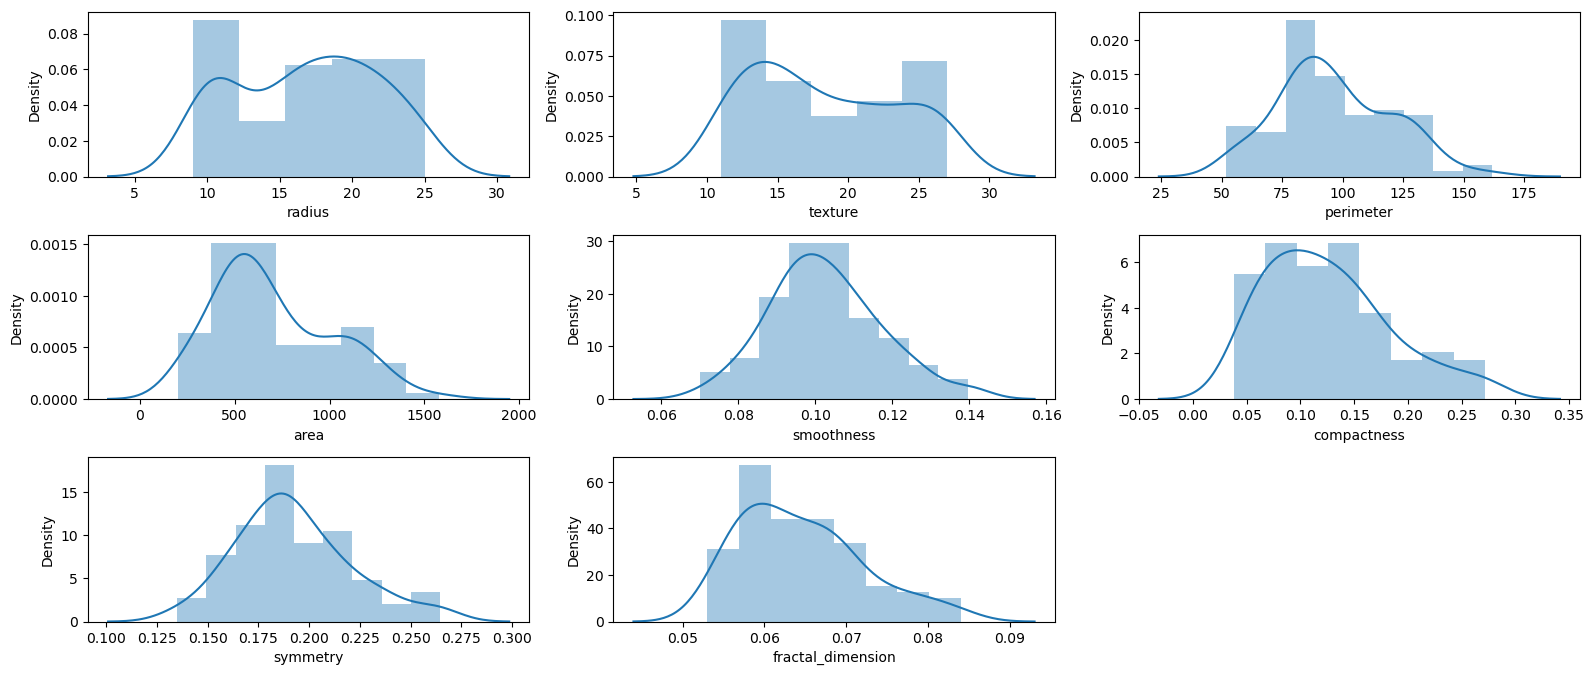

In [25]:
plt.figure(figsize = (16, 22))
plotnumber = 1

for column in dataset.loc[:, dataset.columns != 'diagnosis_result']:
    if plotnumber <= 30:
        ax = plt.subplot(10, 3, plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

1    62
0    38
Name: diagnosis_result, dtype: int64


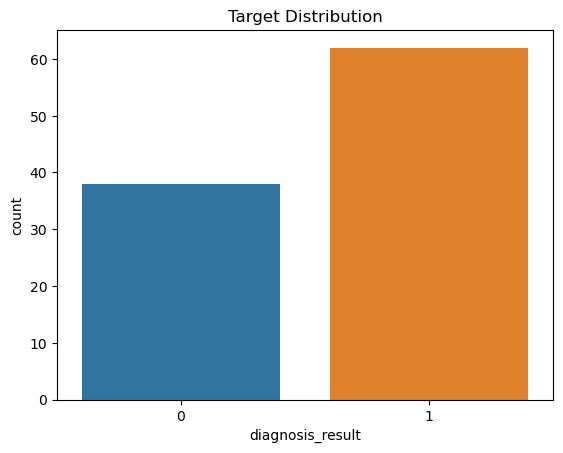

In [26]:
# target variable distribution
print(dataset.diagnosis_result.value_counts())
sns.countplot(x = dataset.diagnosis_result);
plt.title("Target Distribution")
plt.show()

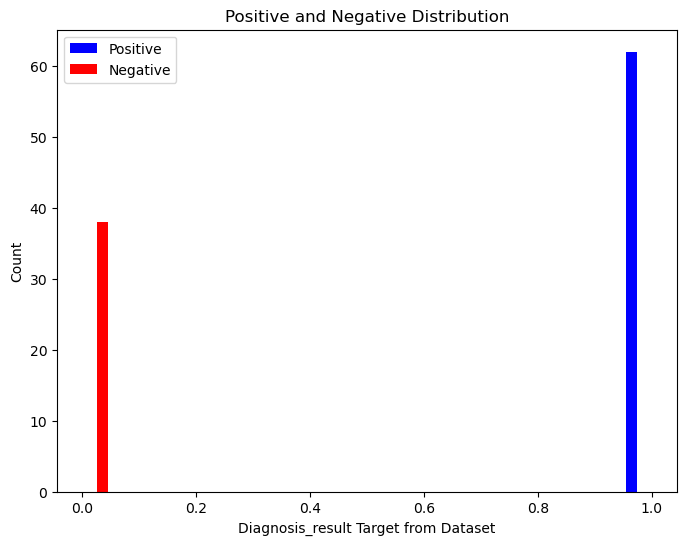

Total Positive Samples: 62
Total Negative Samples: 38


In [27]:

# Count positive and negative samples
positive_samples = dataset[dataset['diagnosis_result'] == 1]
negative_samples = dataset[dataset['diagnosis_result'] == 0]

# Specify the column you want to visualize
column_name = 'Diagnosis_result Target from Dataset'

# Plot the distribution using matplotlib
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.hist([positive_samples['diagnosis_result'], negative_samples['diagnosis_result']],
         bins=20, color=['blue', 'red'], label=['Positive', 'Negative'])
plt.xlabel(column_name)
plt.ylabel('Count')
plt.title('Positive and Negative Distribution')
plt.legend()
plt.show()

# Display info
print("Total Positive Samples:", len(positive_samples))
print("Total Negative Samples:", len(negative_samples))


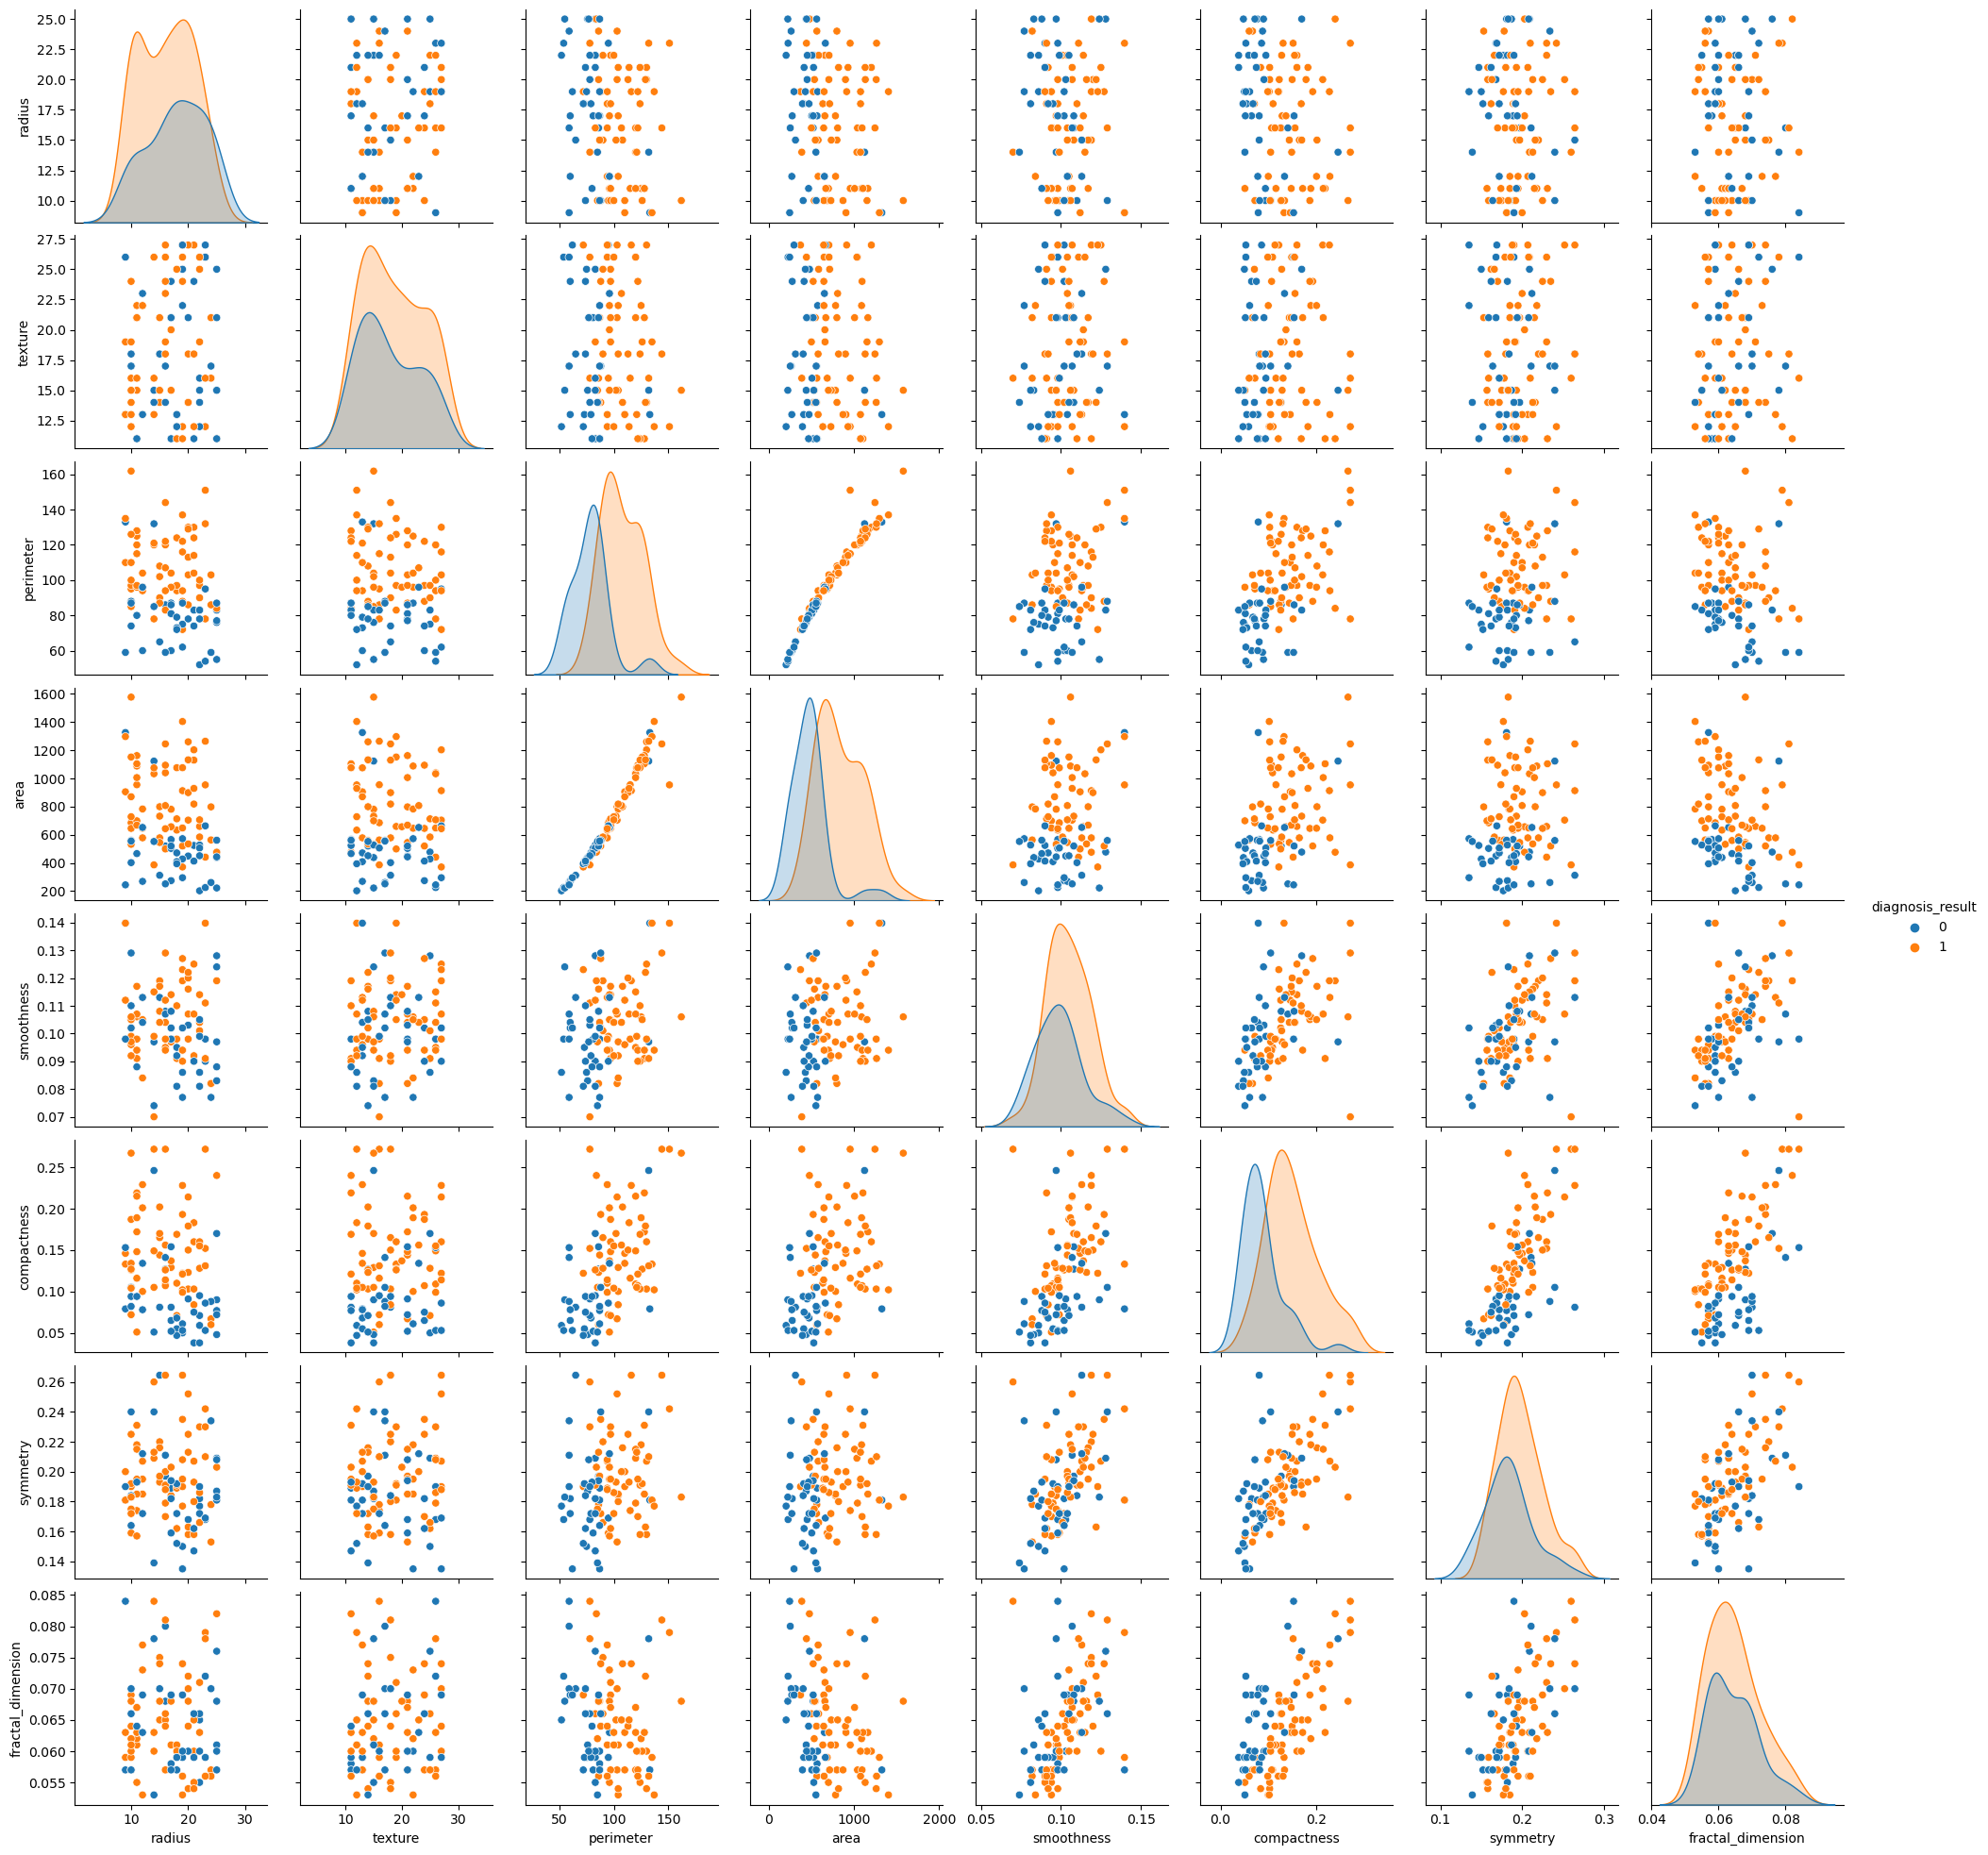

<Figure size 640x480 with 0 Axes>

In [28]:
# Pair plot for numeric features
sns.pairplot(dataset, hue='diagnosis_result')
plt.show()
plt.savefig('Pairplot')
plt.show()

<Axes: >

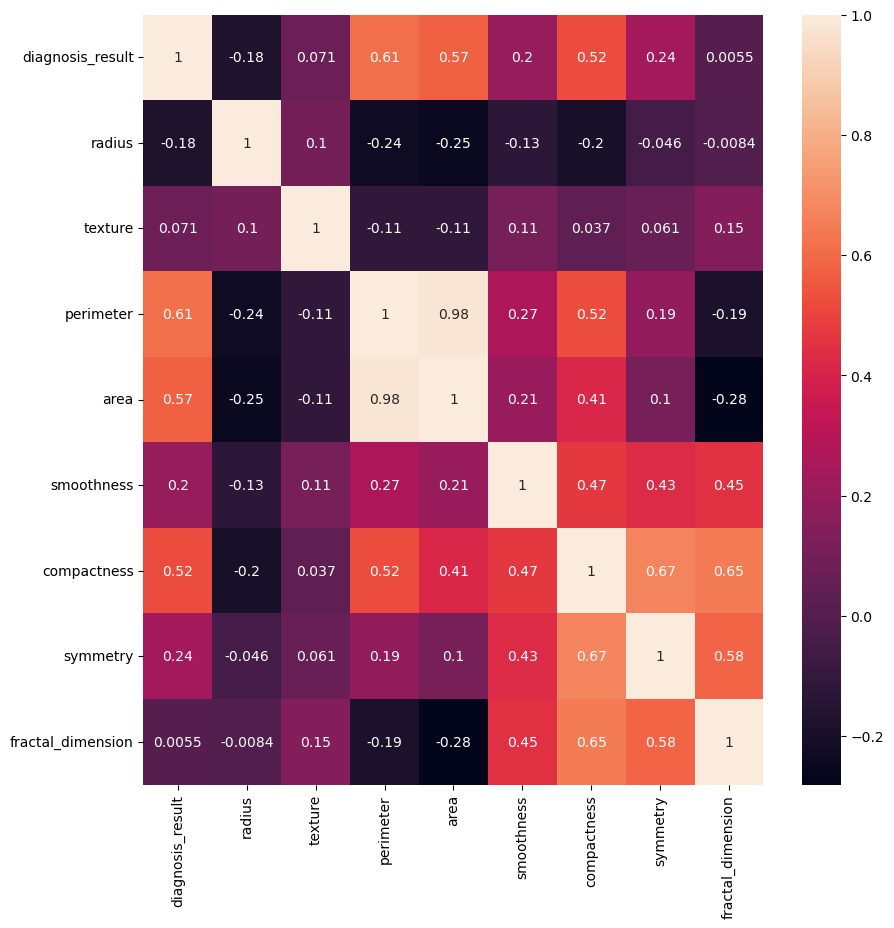

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataset.corr(), annot=True)

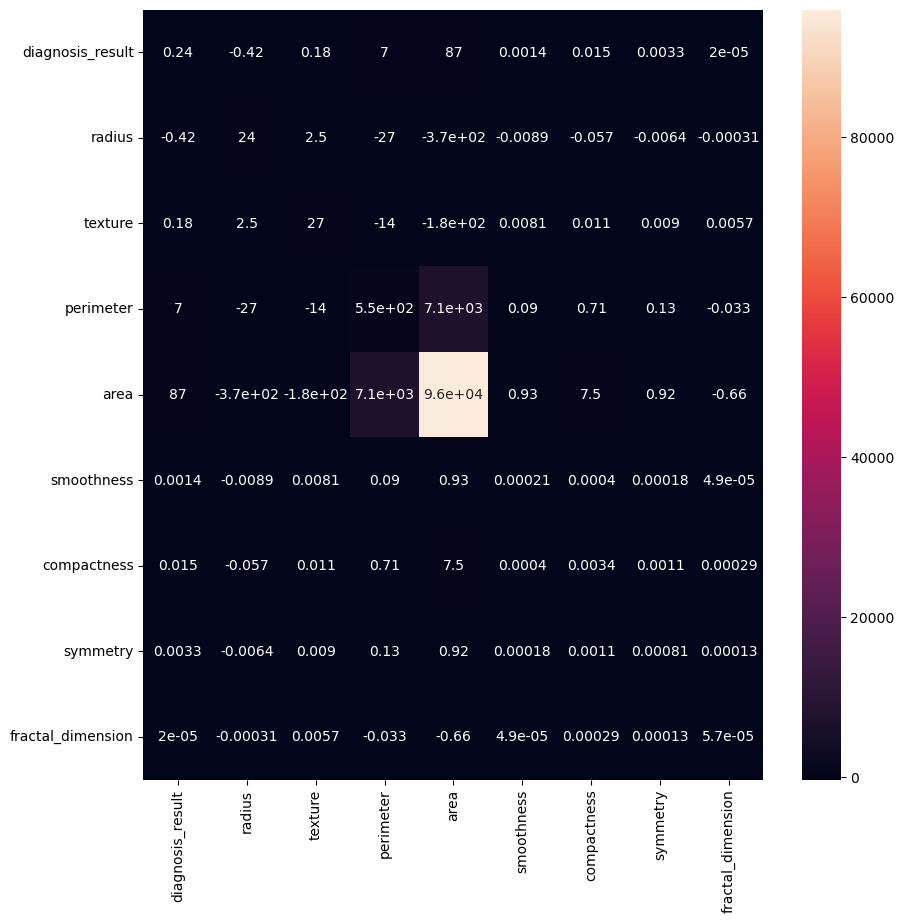

In [30]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(dataset.cov(), annot=True)
plt.show()

In [31]:
#split target and attribute
x = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [32]:
x.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23.0,12.0,151.0,954.0,0.13975,0.27175,0.242,0.079
1,9.0,13.0,133.0,1326.0,0.13975,0.07900,0.181,0.057
2,21.0,27.0,130.0,1203.0,0.12500,0.16000,0.207,0.060
3,14.0,16.0,78.0,386.0,0.07000,0.27175,0.260,0.084
4,9.0,19.0,135.0,1297.0,0.13975,0.13300,0.181,0.059


In [33]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: diagnosis_result, dtype: int64

In [34]:
#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 110)

In [35]:
x_train.shape, x_test.shape

((80, 8), (20, 8))

In [36]:
y_test.shape, y_test.shape

((20,), (20,))

Text(0.5, 1.0, 'testing')

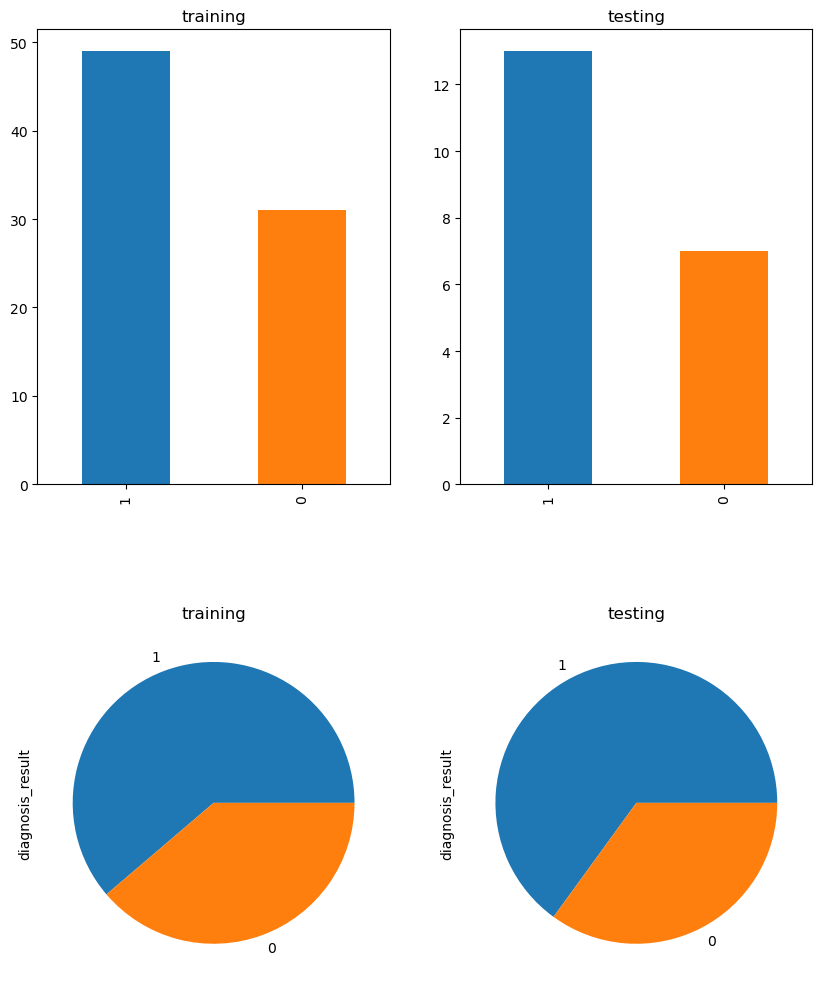

In [37]:
#SPLITTING VISUALIZATION
plt.figure(figsize=(10,13))
plt.subplot(2,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6','C7']);plt.title('training')
plt.subplot(2,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6', 'C7']);plt.title('testing')
plt.subplot(2,2,3);y_train.value_counts().plot(kind='pie');plt.title('training')
plt.subplot(2,2,4);y_test.value_counts().plot(kind='pie',);plt.title('testing')

# Normalisasi

In [38]:
#scalling data dengan Z Score
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
x_train

array([[ 3.53755386e-01,  1.29053247e+00, -9.32532608e-01,
        -8.84156917e-01, -1.21820847e+00, -1.27562004e+00,
        -1.40032228e+00, -7.29536172e-01],
       [-7.02230841e-01, -8.44182895e-01, -5.11257201e-01,
        -4.88546260e-01, -2.03474198e+00, -1.25828972e+00,
        -1.77391137e+00, -1.56329180e+00],
       [-4.91033595e-01, -6.79227617e-02, -3.00619498e-01,
        -4.05595638e-01,  1.02725870e+00,  7.17367031e-01,
         9.77062824e-01,  1.49381216e+00],
       [ 5.64952631e-01,  1.67866254e+00,  2.47038532e-01,
        -3.60416463e-03,  2.10725186e-01,  1.56655283e+00,
         2.06386744e+00,  7.99015808e-01],
       [-6.86391047e-02,  5.14272338e-01, -6.79767364e-01,
        -6.44876278e-01, -4.01674951e-01, -1.24095940e+00,
        -1.09465848e+00, -1.00745471e+00],
       [-7.02230841e-01, -1.03824793e+00,  1.00533426e+00,
         1.18003740e+00, -3.33630492e-01, -3.22452310e-01,
         7.39324314e-01, -5.90576901e-01],
       [-4.91033595e-01, -6.501178

# Modelling 

# Voting Classfier

In [39]:
#choose method
clf1 = LogisticRegression(random_state=110)
clf2 = RandomForestClassifier(n_estimators=50, random_state=110)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier(n_neighbors = 3)
clf5 = DecisionTreeClassifier(random_state=110)

In [40]:
model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3),('knn',clf4), ('dct',clf5)], voting='soft')
model.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=110)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=110)),
                             ('gnb', GaussianNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('dct', DecisionTreeClassifier(random_state=110))],
                 voting='soft')

In [41]:
y_pred = model.predict(x_test)

# Evaluasi Model

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



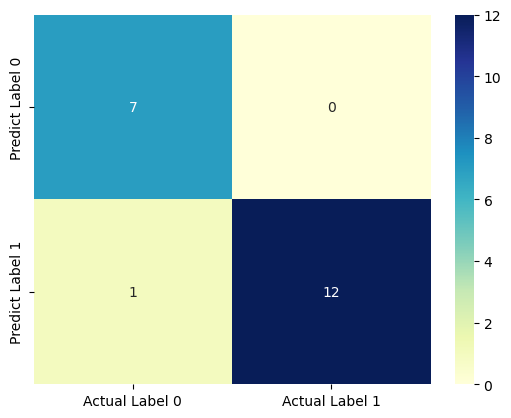

In [42]:
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Label 0', 'Actual Label 1'],
                                 index=['Predict Label 0', 'Predict Label 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred))

# Cross Validate

In [43]:
#crossvalidation
accuracy = cross_val_score(model,x,y, cv=5, scoring='accuracy')
precision = cross_val_score(model,x,y, cv=5, scoring='precision_weighted')
recall = cross_val_score(model,x,y, cv=5, scoring='recall_weighted')
f1 = cross_val_score(model,x,y, cv=5, scoring='f1_weighted')
print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('F1-Score', f1)

accuracy [0.7  0.95 0.75 0.9  0.9 ]
precision [0.7        0.95625    0.84615385 0.9        0.91428571]
recall [0.7  0.95 0.75 0.9  0.9 ]
F1-Score [0.7        0.95066667 0.74686717 0.9        0.8967033 ]


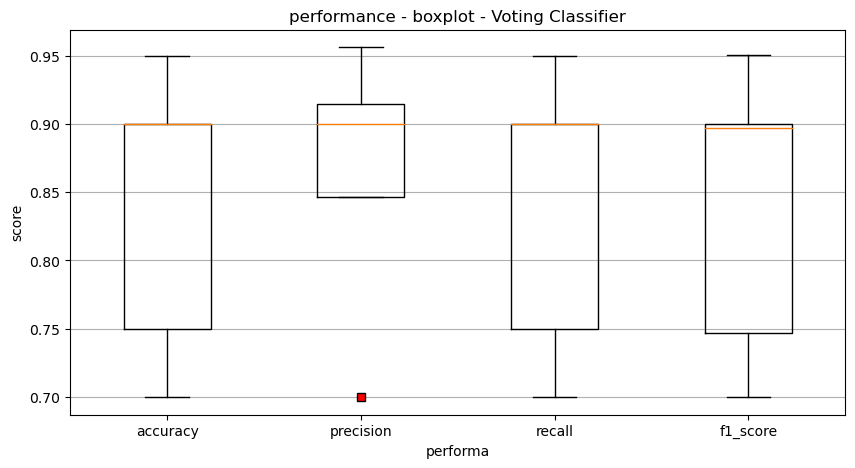

In [44]:
#BOXPLOT VISUALIZATION

fig1, ax1 = plt.subplots(figsize=(10,5))

#green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')


# grouping
all_data = [accuracy,precision,recall,f1]
ax1.set_title('performance - boxplot - Voting Classifier')

# plot box plot
ax1.boxplot(all_data,notch=False,flierprops=red_square)


#adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('performa')
ax1.set_ylabel('score')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'accuracy','precision','recall','f1_score'])
plt.show()

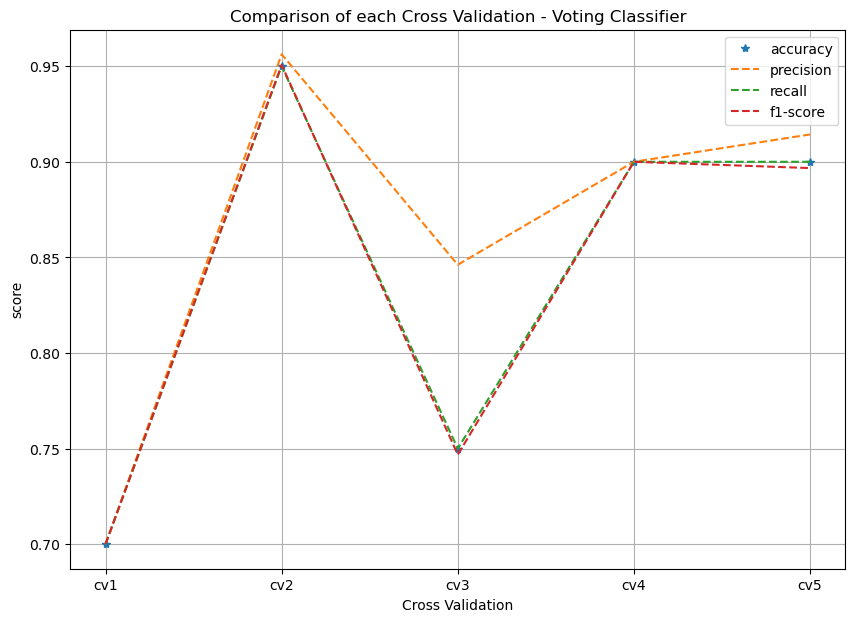

In [45]:
plt.figure(figsize=(10,7))
xx = ["cv1", "cv2", "cv3", "cv4", "cv5"] #, "cv6", "cv7", "cv8", "cv9", "cv10"
plt.plot(xx, accuracy, '*')
plt.plot(xx, precision, '--')
plt.plot(xx, recall, '--')
plt.plot(xx, f1, '--')
plt.title("Comparison of each Cross Validation - Voting Classifier")
plt.xlabel("Cross Validation")
plt.ylabel("score")
plt.legend(["accuracy","precision", "recall", "f1-score"])
plt.grid()
plt.show()

# Bagging Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
bagging = BaggingClassifier(random_state=110)
bagging.fit(x_train, y_train)

BaggingClassifier(random_state=110)

In [47]:
y_pred_bag = bagging.predict(x_test)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20



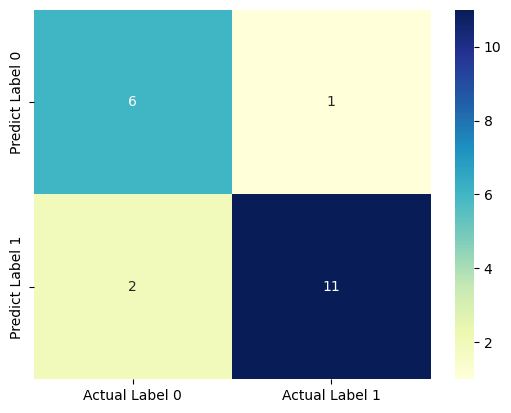

In [48]:
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred_bag)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Label 0', 'Actual Label 1'],
                                 index=['Predict Label 0', 'Predict Label 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred_bag))

# Cross Validate

In [49]:
#crossvalidation
accuracy_bag = cross_val_score(bagging,x,y, cv=5, scoring='accuracy')
precision_bag = cross_val_score(bagging,x,y, cv=5, scoring='precision_weighted')
recall_bag = cross_val_score(bagging,x,y, cv=5, scoring='recall_weighted')
f1_bag = cross_val_score(bagging,x,y, cv=5, scoring='f1_weighted')
print('accuracy', accuracy_bag)
print('precision', precision_bag)
print('recall', recall_bag)
print('F1-Score', f1_bag)

accuracy [0.65 0.8  0.7  0.85 0.85]
precision [0.6625     0.87272727 0.75833333 0.85656566 0.88      ]
recall [0.65 0.8  0.7  0.85 0.85]
F1-Score [0.65466667 0.8040404  0.7        0.8511509  0.84102564]


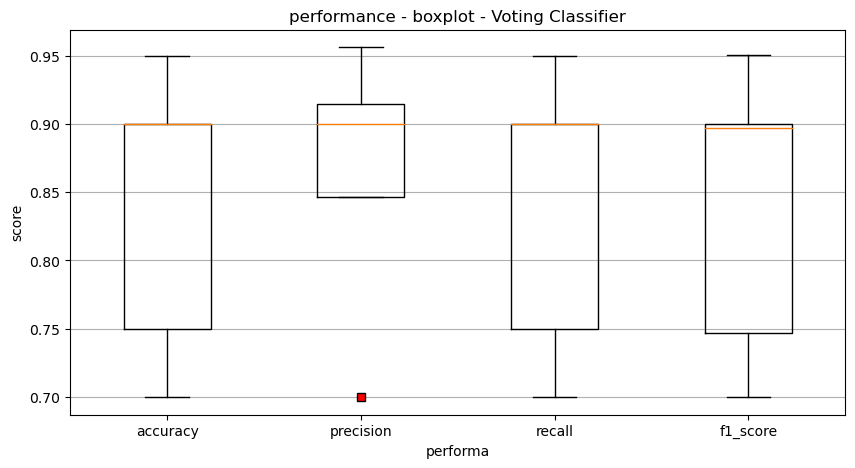

In [50]:
#BOXPLOT VISUALIZATION

fig1, ax1 = plt.subplots(figsize=(10,5))

#green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')


# grouping
all_data = [accuracy,precision,recall,f1]
ax1.set_title('performance - boxplot - Voting Classifier')

# plot box plot
ax1.boxplot(all_data,notch=False,flierprops=red_square)


#adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('performa')
ax1.set_ylabel('score')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'accuracy','precision','recall','f1_score'])
plt.show()

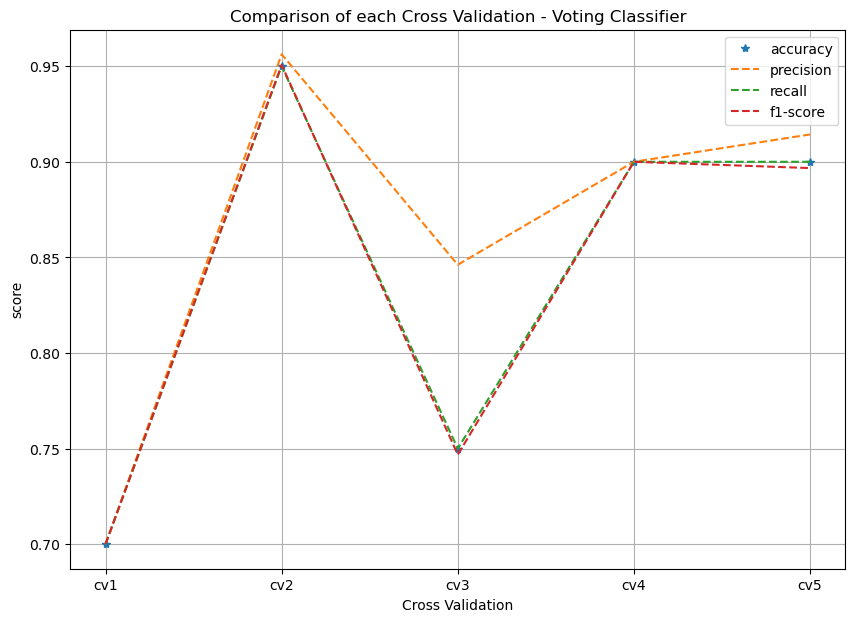

In [51]:
plt.figure(figsize=(10,7))
xx = ["cv1", "cv2", "cv3", "cv4", "cv5"] #, "cv6", "cv7", "cv8", "cv9", "cv10"
plt.plot(xx, accuracy, '*')
plt.plot(xx, precision, '--')
plt.plot(xx, recall, '--')
plt.plot(xx, f1, '--')
plt.title("Comparison of each Cross Validation - Voting Classifier")
plt.xlabel("Cross Validation")
plt.ylabel("score")
plt.legend(["accuracy","precision", "recall", "f1-score"])
plt.grid()
plt.show()

# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=110)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=110)

In [53]:
y_pred_rf = rfc.predict(x_test)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20



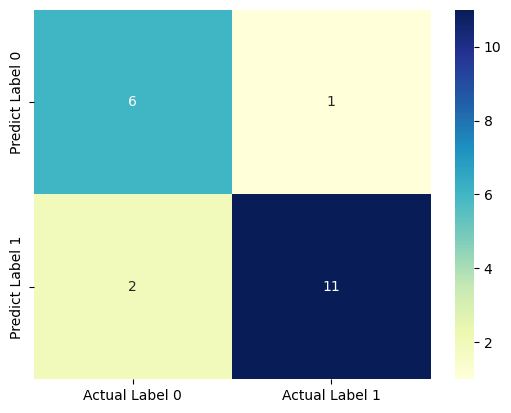

In [54]:
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred_bag)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Label 0', 'Actual Label 1'],
                                 index=['Predict Label 0', 'Predict Label 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred_bag))


In [55]:
#crossvalidation
accuracy_bag = cross_val_score(bagging,x,y, cv=5, scoring='accuracy')
precision_bag = cross_val_score(bagging,x,y, cv=5, scoring='precision_weighted')
recall_bag = cross_val_score(bagging,x,y, cv=5, scoring='recall_weighted')
f1_bag = cross_val_score(bagging,x,y, cv=5, scoring='f1_weighted')
print('accuracy', accuracy_bag)
print('precision', precision_bag)
print('recall', recall_bag)
print('F1-Score', f1_bag)

accuracy [0.65 0.8  0.7  0.85 0.85]
precision [0.6625     0.87272727 0.75833333 0.85656566 0.88      ]
recall [0.65 0.8  0.7  0.85 0.85]
F1-Score [0.65466667 0.8040404  0.7        0.8511509  0.84102564]


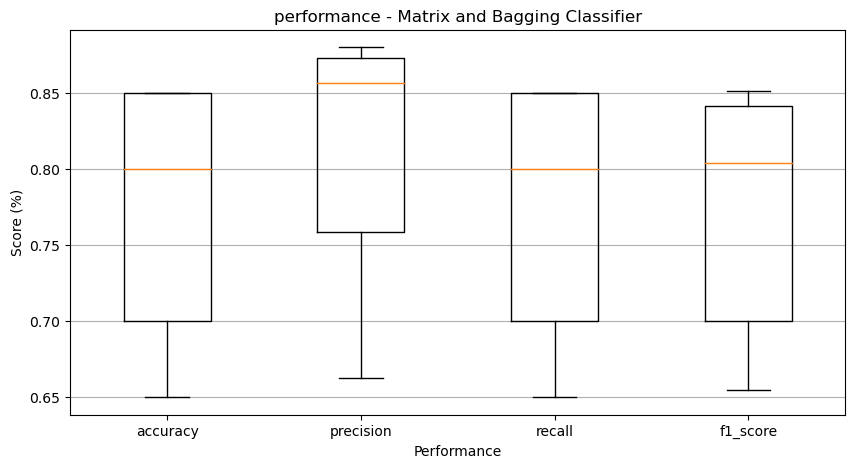

In [56]:
#BOXPLOT VISUALIZATION

fig1, ax1 = plt.subplots(figsize=(10,5))

#green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')


# grouping
all_data = [accuracy_bag,precision_bag,recall_bag,f1_bag]
ax1.set_title('performance - Matrix and Bagging Classifier')

# plot box plot
ax1.boxplot(all_data,notch=False,flierprops=red_square)


#adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('Performance')
ax1.set_ylabel('Score (%)')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'accuracy','precision','recall','f1_score'])
plt.show()

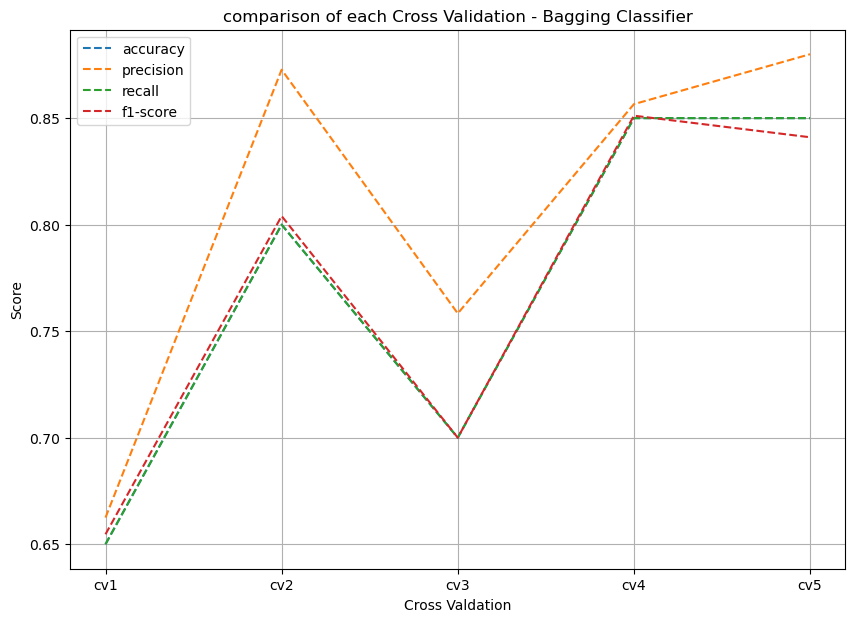

In [57]:
plt.figure(figsize=(10,7))
xx = ["cv1", "cv2", "cv3", "cv4", "cv5"] #, "cv6", "cv7", "cv8", "cv9", "cv10"
plt.plot(xx, accuracy_bag, '--')
plt.plot(xx, precision_bag, '--')
plt.plot(xx, recall_bag, '--')
plt.plot(xx, f1_bag, '--')
plt.title("comparison of each Cross Validation - Bagging Classifier")
plt.xlabel("Cross Valdation")
plt.ylabel("Score")
plt.legend(["accuracy","precision", "recall", "f1-score"])
plt.grid()
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=110)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=110)

In [59]:
y_pred_rf = rfc.predict(x_test)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



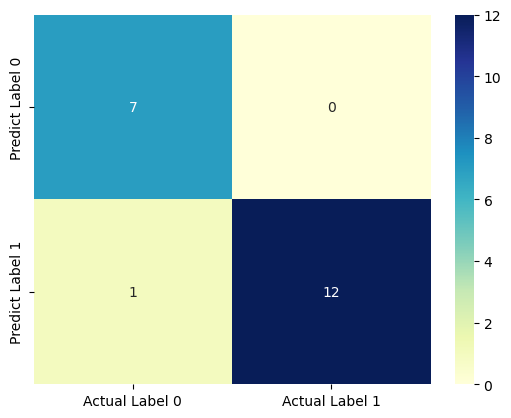

In [60]:
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred_rf)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Label 0', 'Actual Label 1'],
                                 index=['Predict Label 0', 'Predict Label 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred_rf))

In [61]:
#crossvalidation
accuracy_rf = cross_val_score(rfc,x,y, cv=5, scoring='accuracy')
precision_rf = cross_val_score(rfc,x,y, cv=5, scoring='precision_weighted')
recall_rf = cross_val_score(rfc,x,y, cv=5, scoring='recall_weighted')
f1_rf = cross_val_score(rfc,x,y, cv=5, scoring='f1_weighted')
print('accuracy', accuracy_rf)
print('precision', precision_rf)
print('recall', recall_rf)
print('F1-Score', f1_rf)

accuracy [0.75 0.95 0.7  0.85 0.9 ]
precision [0.75       0.95625    0.75833333 0.85054945 0.91428571]
recall [0.75 0.95 0.7  0.85 0.9 ]
F1-Score [0.72884013 0.95066667 0.7        0.848      0.8967033 ]


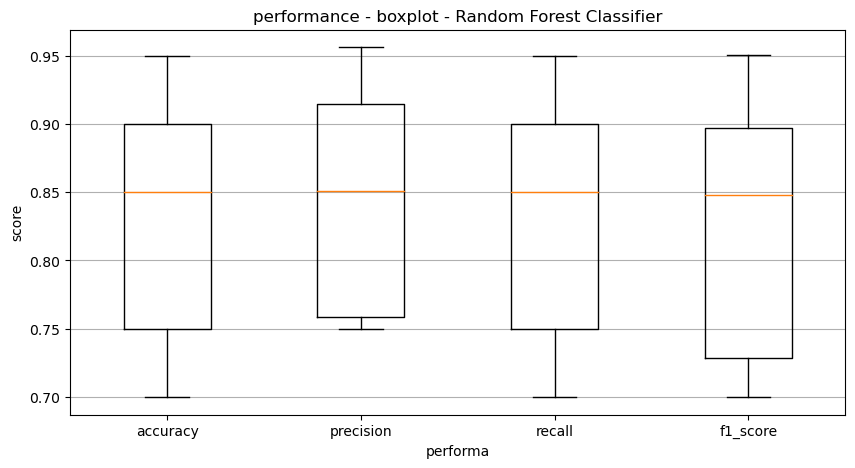

In [62]:
#BOXPLOT VISUALIZATION

fig1, ax1 = plt.subplots(figsize=(10,5))

#green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')


# grouping
all_data = [accuracy_rf,precision_rf,recall_rf,f1_rf]
ax1.set_title('performance - boxplot - Random Forest Classifier')

# plot box plot
ax1.boxplot(all_data,notch=False,flierprops=red_square)


#adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('performa')
ax1.set_ylabel('score')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'accuracy','precision','recall','f1_score'])
plt.show()

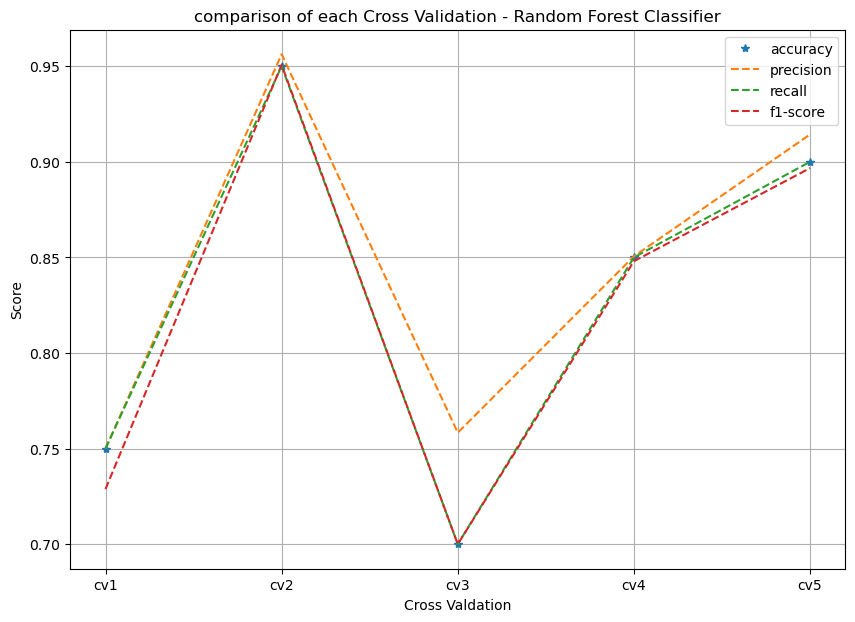

In [63]:
plt.figure(figsize=(10,7))
xx = ["cv1", "cv2", "cv3", "cv4", "cv5"] #, "cv6", "cv7", "cv8", "cv9", "cv10"
plt.plot(xx, accuracy_rf, '*')
plt.plot(xx, precision_rf, '--')
plt.plot(xx, recall_rf, '--')
plt.plot(xx, f1_rf, '--')
plt.title("comparison of each Cross Validation - Random Forest Classifier")
plt.xlabel("Cross Valdation")
plt.ylabel("Score")
plt.legend(["accuracy","precision", "recall", "f1-score"])
plt.grid()
plt.show()

# Stacking 

In [64]:
# base model
clf1 = LogisticRegression(random_state=110)
clf2 = RandomForestClassifier(n_estimators=50, random_state=110)
clf3 = GaussianNB()
clf4 = KNeighborsClassifier(n_neighbors = 3)
clf5 = DecisionTreeClassifier(random_state=110)

In [65]:
# list base model
level0 = list()
level0.append(('lr', clf1))
level0.append(('rf', clf2))
level0.append(('bayes', clf3))
level0.append(('knn', clf4))
level0.append(('cart', clf5))

In [66]:
from sklearn.ensemble import StackingClassifier
#eta learner model
level1 = LogisticRegression()
#stacking ensemble
stacking = StackingClassifier(estimators=level0, final_estimator=level1)
stacking.fit(x_train,y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=110)),
                               ('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=110)),
                               ('bayes', GaussianNB()),
                               ('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('cart',
                                DecisionTreeClassifier(random_state=110))],
                   final_estimator=LogisticRegression())

In [67]:
y_pred_st = stacking.predict(x_test)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.92      0.96        13

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



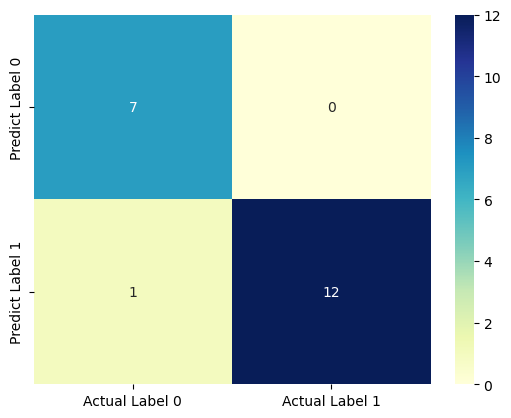

In [68]:
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred_st)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Label 0', 'Actual Label 1'],
                                 index=['Predict Label 0', 'Predict Label 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred_st))


In [69]:
#crossvalidation
accuracy_st = cross_val_score(stacking,x,y, cv=5, scoring='accuracy')
precision_st = cross_val_score(stacking,x,y, cv=5, scoring='precision_weighted')
recall_st = cross_val_score(stacking,x,y, cv=5, scoring='recall_weighted')
f1_st = cross_val_score(stacking,x,y, cv=5, scoring='f1_weighted')
print('accuracy', accuracy_st)
print('precision', precision_st)
print('recall', recall_st)
print('F1-Score', f1_st)

accuracy [0.85 0.95 0.75 0.8  0.9 ]
precision [0.878125   0.95625    0.84615385 0.8        0.91428571]
recall [0.85 0.95 0.75 0.8  0.9 ]
F1-Score [0.83730408 0.95066667 0.74686717 0.8        0.8967033 ]


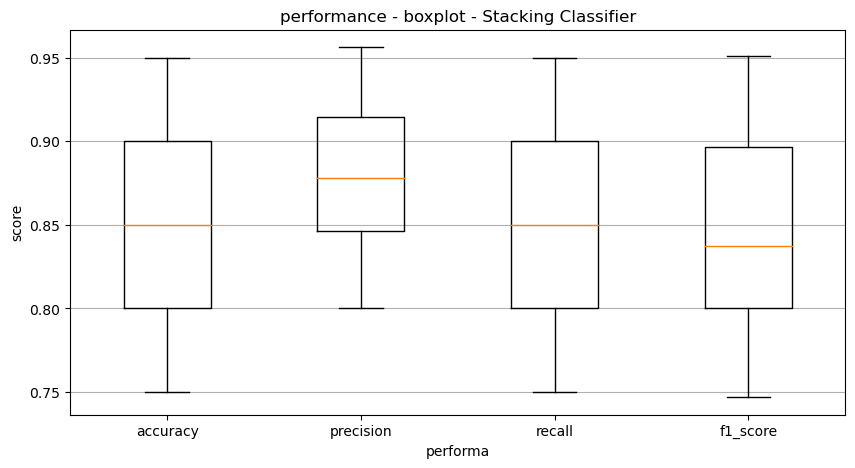

In [70]:
#BOXPLOT VISUALIZATION

fig1, ax1 = plt.subplots(figsize=(10,5))

#green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')


# grouping
all_data = [accuracy_st,precision_st,recall_st,f1_st]
ax1.set_title('performance - boxplot - Stacking Classifier')

# plot box plot
ax1.boxplot(all_data,notch=False,flierprops=red_square)


#adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('performa')
ax1.set_ylabel('score')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'accuracy','precision','recall','f1_score'])
plt.show()

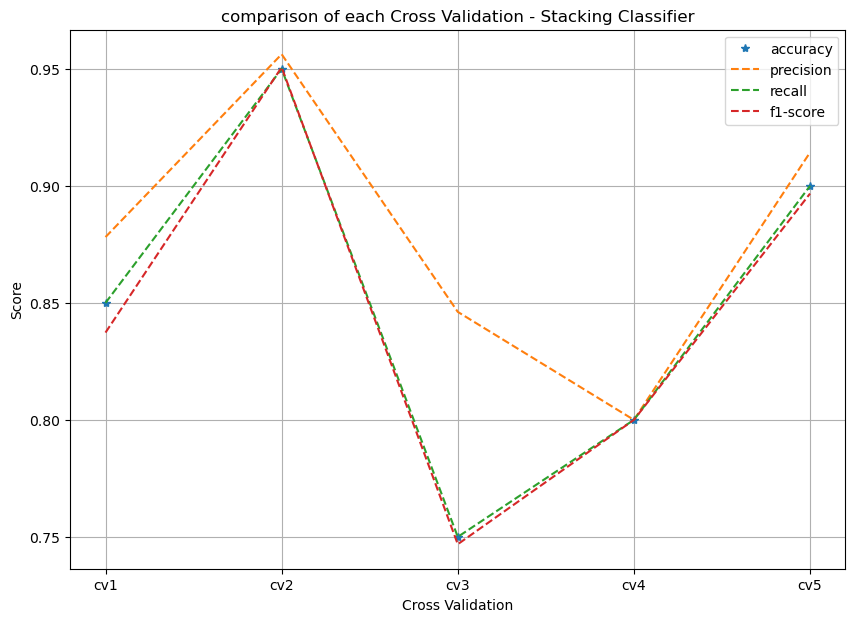

In [71]:
plt.figure(figsize=(10,7))
xx = ["cv1", "cv2", "cv3", "cv4", "cv5"] #, "cv6", "cv7", "cv8", "cv9", "cv10"
plt.plot(xx, accuracy_st, '*')
plt.plot(xx, precision_st, '--')
plt.plot(xx, recall_st, '--')
plt.plot(xx, f1_st, '--')
plt.title("comparison of each Cross Validation - Stacking Classifier")
plt.xlabel("Cross Validation")
plt.ylabel("Score")
plt.legend(["accuracy","precision", "recall", "f1-score"])
plt.grid()
plt.show()

In [72]:
from xgboost import XGBClassifier
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }

xgb_clf = XGBClassifier(**params)
xgb_clf.fit(x_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [73]:
y_pred_xgb = xgb_clf.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.92      0.92      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20



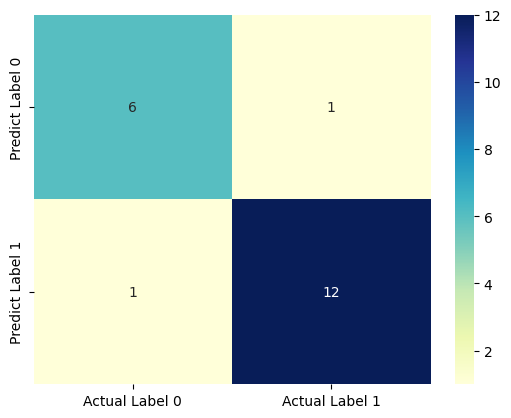

In [74]:
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred_xgb)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Label 0', 'Actual Label 1'],
                                 index=['Predict Label 0', 'Predict Label 1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred_xgb))


In [75]:
#crossvalidation
accuracy_xgb = cross_val_score(xgb_clf,x,y, cv=5, scoring='accuracy')
precision_xgb = cross_val_score(xgb_clf,x,y, cv=5, scoring='precision_weighted')
recall_xgb = cross_val_score(xgb_clf,x,y, cv=5, scoring='recall_weighted')
f1_xgb = cross_val_score(xgb_clf,x,y, cv=5, scoring='f1_weighted')
print('accuracy', accuracy_xgb)
print('precision', precision_xgb)
print('recall', recall_xgb)
print('F1-Score', f1_xgb)

accuracy [0.8  0.85 0.8  0.85 0.85]
precision [0.84705882 0.895      0.86666667 0.88       0.85054945]
recall [0.8  0.85 0.8  0.85 0.85]
F1-Score [0.77333333 0.85345269 0.8        0.84102564 0.848     ]


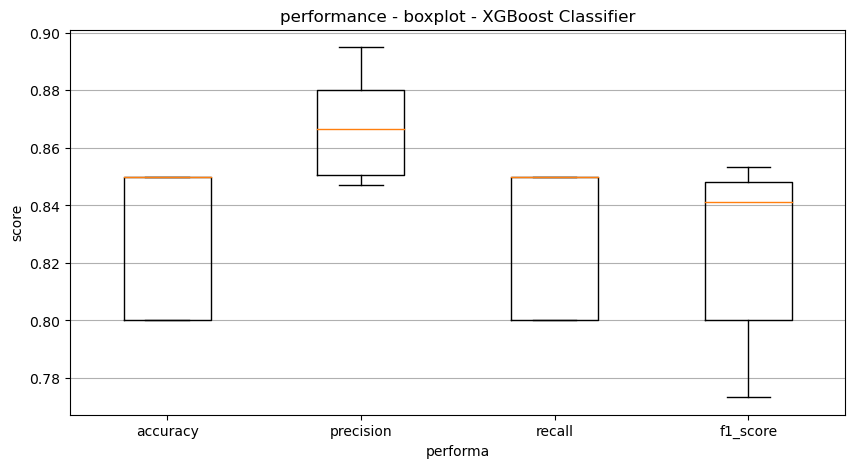

In [76]:
#BOXPLOT VISUALIZATION

fig1, ax1 = plt.subplots(figsize=(10,5))

#green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')


# grouping
all_data = [accuracy_xgb,precision_xgb,recall_xgb,f1_xgb]
ax1.set_title('performance - boxplot - XGBoost Classifier')

# plot box plot
ax1.boxplot(all_data,notch=False,flierprops=red_square)


#adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xticks([y +1 for y in range(len(all_data))])
ax1.set_xlabel('performa')
ax1.set_ylabel('score')

#add x-tick labels
plt.setp(ax1, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=[ 'accuracy','precision','recall','f1_score'])
plt.show()

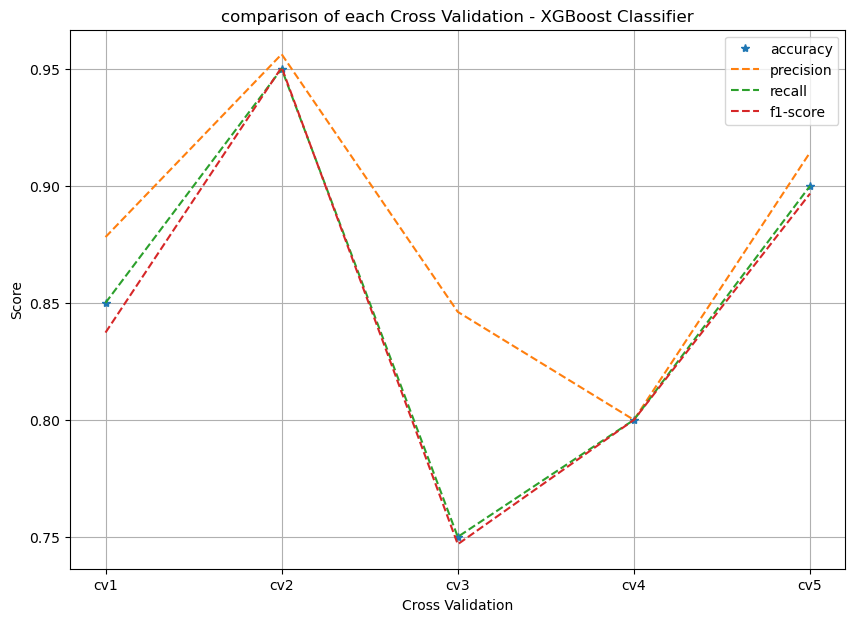

In [77]:
plt.figure(figsize=(10,7))
xx = ["cv1", "cv2", "cv3", "cv4", "cv5"] #, "cv6", "cv7", "cv8", "cv9", "cv10"
plt.plot(xx, accuracy_st, '*')
plt.plot(xx, precision_st, '--')
plt.plot(xx, recall_st, '--')
plt.plot(xx, f1_st, '--')
plt.title("comparison of each Cross Validation - XGBoost Classifier")
plt.xlabel("Cross Validation")
plt.ylabel("Score")
plt.legend(["accuracy","precision", "recall", "f1-score"])
plt.grid()
plt.show()